## annotated transformer(from Harvard NLP)

In [124]:
import torch
import torch.nn as nn
import numpy as np
import math
import torch.nn.functional as F


query = torch.FloatTensor([[1,2,3],[4,5,6],[7,8,9],[3,2,3],[3,2,1],[1,2,3]])
key = torch.FloatTensor([[2.2,4,3],[6,9,1],[8,2,9],[1,4,5],[2,4,5],[3,2,9]])
value = torch.FloatTensor([[1,1,1],[1,1,1],[1,1,1],[1,1,1],[1,1,1],[4,8,9]])

def attention(query, key, value, mask=None, dropout=None):
    d_k = query.size(-1)
    scores = torch.matmul(query,key.transpose(-2, -1)) / math.sqrt(d_k)
    
    if mask is not None:
        # masked_fill(mask,value)
        # fills elements of self tensor with value where mask is one
        scores = scores.masked_fill(mask == 0, -1e9)
    p_attn = F.softmax(scores,dim=-1)
    if dropout is not None:
        p_attn = dropout(p_attn)
        
    # value에 확률값 곱하고 더한 벡터, 확률값
    return torch.matmul(p_attn,value), p_attn

In [125]:
class MultiHeadedAttention(nn.Module):
    def __init__(self, h, d_model, dropout=0.1):
        super(MultiHeadedAttention, self).__init__()
        assert d_model % h == 0
        self.d_k = d_model // h
        self.h = h
        self.linears = clones(nn.Linear(d_model, d_model), 4)
        self.attn = None
        self.dropout = nn.Dropout(p=dropout)
        
    def forward(self, query, key, value, mask = None):
        if mask is not None:
            mask = mask.unsqueeze(1)
        nbatches = query.size(0)
        
        # linear projections in batch from d_model
        query, key, value = [l(x).view(nbatches, -1, self.h, self.d_k).transpose(1,2)
                            for l, x in zip(self.linears, (query, key, value))]
        
        # apply attention on all the projected vectors in batch
        x, self.attn = attention(query, key, value, mask = mask,
                                dropout = self.dropout)
 
        # concat using a view and apply a final linear
        x = x.transpose(1,2).contiguous().view(nbatches, -1, self.h * self.d_k)
        return self.linears[-1](x)

(tensor([[1.1582, 1.3692, 1.4219],
         [1.0000, 1.0001, 1.0001],
         [1.0000, 1.0000, 1.0000],
         [1.0005, 1.0012, 1.0014],
         [1.0003, 1.0006, 1.0007],
         [1.1582, 1.3692, 1.4219]]),
 tensor([[1.0261e-05, 9.2672e-04, 9.4587e-01, 1.6396e-04, 2.9206e-04, 5.2739e-02],
         [4.6087e-13, 5.4256e-06, 9.9998e-01, 2.9438e-11, 2.9640e-10, 9.6648e-06],
         [1.9581e-20, 3.0047e-08, 1.0000e+00, 4.9996e-18, 2.8452e-16, 1.6753e-09],
         [1.3386e-08, 9.7284e-05, 9.9973e-01, 5.3508e-08, 3.0244e-07, 1.7329e-04],
         [6.8323e-06, 4.9994e-01, 4.9994e-01, 2.7126e-06, 1.5332e-05, 8.6660e-05],
         [1.0261e-05, 9.2672e-04, 9.4587e-01, 1.6396e-04, 2.9206e-04, 5.2739e-02]]))

In [102]:
class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()

tensor([[25, 25, 14, 14],
        [25, 25, 14, 14],
        [25, 25, 14, 14],
        [25, 25, 14, 14]])

In [3]:
import torch
torch.arange(0,5000).unsqueeze(1)

tensor([[   0],
        [   1],
        [   2],
        ...,
        [4997],
        [4998],
        [4999]])

In [23]:
import math
a = torch.exp(torch.arange(0, 512, 2, dtype = torch.float32) * -(math.log(10000.0) / 512))

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
import torch.nn as nn
class PositionalEncoding(nn.Module):
    "Implement the PE function."
    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype = torch.float32).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2, dtype = torch.float32) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        x = x + Variable(self.pe[:, :x.size(1)], 
                         requires_grad=False)
        return self.dropout(x)

In [60]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe.forward(Variable(torch.zeros(1, 100, 20)))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d"%p for p in [4,5,6,7]])
None

NameError: name 'Variable' is not defined

<Figure size 1080x360 with 0 Axes>

In [25]:
import numpy as np
attn_shape = (1,512,512)
subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
a = torch.from_numpy(subsequent_mask) == 0

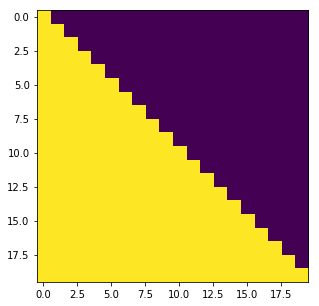

In [26]:
def subsequent_mask(size):
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(subsequent_mask) == 0

plt.figure(figsize=(5,5))
plt.imshow(subsequent_mask(20)[0])
None

In [21]:
a = torch.tensor([[1,2,3],[6,2,5]])
a.transpose(-2,-1)

tensor([[1, 6],
        [2, 2],
        [3, 5]])

In [54]:
a = torch.arange(0, 512, 2) * -(math.log(10000.0) / 512)
b = torch.arange(0, 512, 2, dtype=torch.float32) * -(math.log(10000.0) / 512)

print(b.dtype)

torch.float32


In [58]:
position = torch.arange(0, 5000).unsqueeze(1)
print(position.dtype)

torch.int64


In [72]:
import torch
trg = torch.tensor([[1,2,3,4,5],[6,3,6,3,7],[2,8,2,3,7]])

In [75]:
trg[:,:-1]
trg[:,1:]

tensor([[2, 3, 4, 5],
        [3, 6, 3, 7],
        [8, 2, 3, 7]])